# Actividad

- **Nombre**: Andrea Bravo
- **Matrícula**: A01028579

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.

In [1]:
# Si trabajamos en Google Colaboratory corremos las siguientes lineas de código
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Nos cambiamos a la carpeta donde tengamos el repositorio
%cd 'drive/MyDrive/TecSem2/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/TecSem2/SemanaTec/Repos/arte-analitica


# Highway MPG dataset

Este dataset contiene variables medidas por la agencia de protección ambiental de 38 modelos de vehículo diferentes de 1999 a 2008. Las variables que se registraron fueron:

* **manufacturer**: nombre del fabricante.
* **model**: nombre del modelo.
* **displ**: desplacamiento del motor, en litros.
* **year**: año de fabricación.
* **cyl**: número de cilindros.
* **trans**: tipo de transmisión.
* **drv**: tipo de tracción, f-delantera, r-trasera, 4- 4 llantas
* **cty**: rendimiento del motor en ciudad, en millas por galón.
* **hwy**: rendimiento del motor en carretera, en millas por galón.
* **fl**: tipo de combustible.
* **class**: tipo de vehículo.

In [5]:
# Carga las librerías y datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

auto_df=pd.read_csv('data/auto-mpg.csv')

auto_df.head() #ver una muestra de los datos


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Text(0.5, 1.0, 'Observaciones por fabricante')

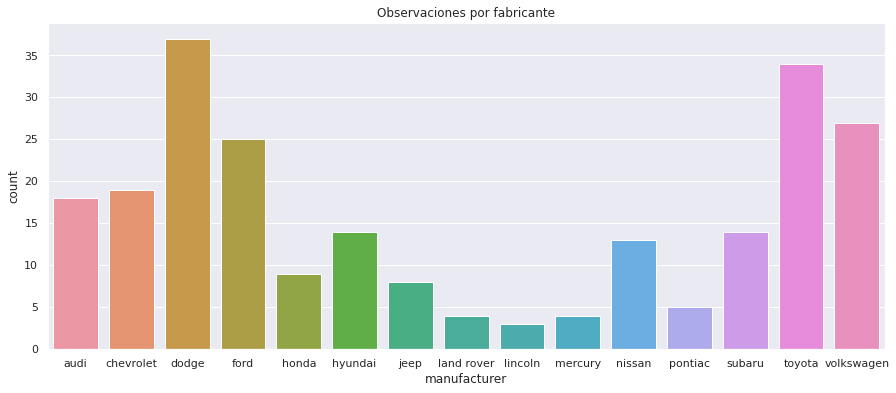

In [49]:
# ¿Cuántas observaciones hay de cada fabricante? Muéstralo en un gráfico.
fig = plt.figure(figsize=(15, 6))
sns.countplot(data=auto_df, x='manufacturer')
plt.title('Observaciones por fabricante')

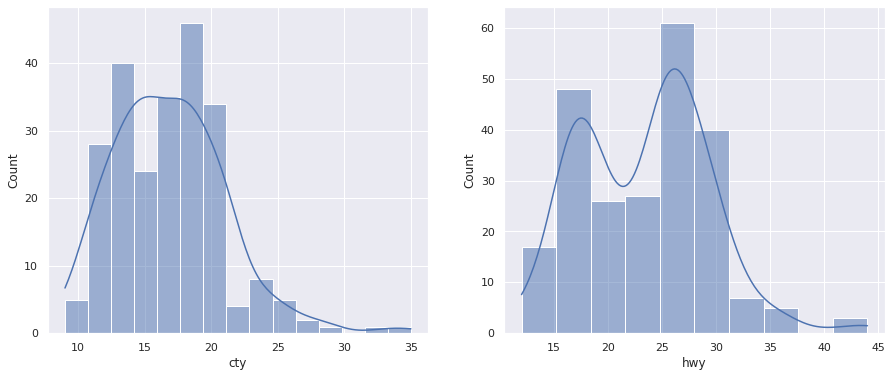

In [53]:
# Haz un histograma de las variables numéricas cty, hwy y haz una comparación en un gráfico lado a lado
fig, axs = plt.subplots(1,2, figsize=(15, 6))
sns.histplot(data=auto_df, x='cty', bins=15, kde=True, ax=axs[0])
sns.histplot(data=auto_df, x='hwy', bins=10, kde=True, ax=axs[1])


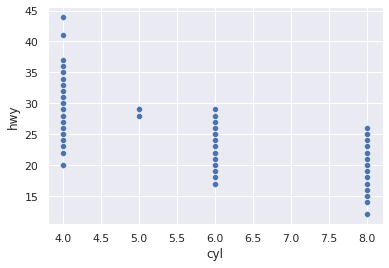

In [47]:
# ¿Cómo se comparar el rendimiento en carretera (hwy) contra el número de cilindros? 
# Haz un gráfico que represente esta relación.

sns.scatterplot(data=auto_df, x='cyl', y='hwy')

Text(0.5, 1.0, 'Comparacion de rendimiento del motor en carretera por numero de cilindros')

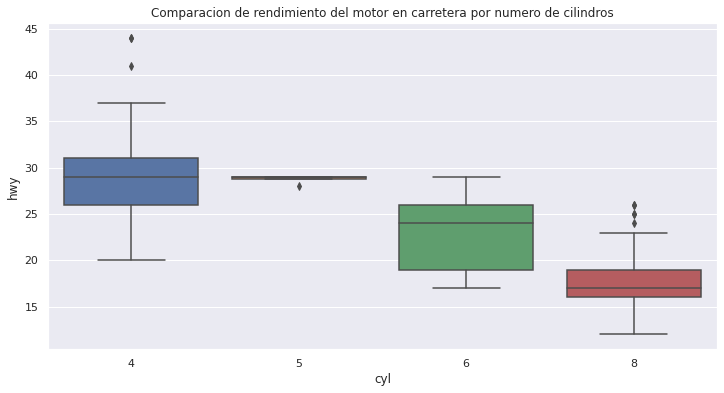

In [27]:
# cyl es una variable numérica, pero como tiene pocos valores podemos tomarla como si fuera categórica.
# ¿De qué otra forma se puede representar la relación de la pregunta anterior?
fig=plt.figure(figsize=(12,6))
sns.boxplot(data = auto_df, x='cyl', y='hwy')
plt.title('Comparacion de rendimiento del motor en carretera por numero de cilindros')

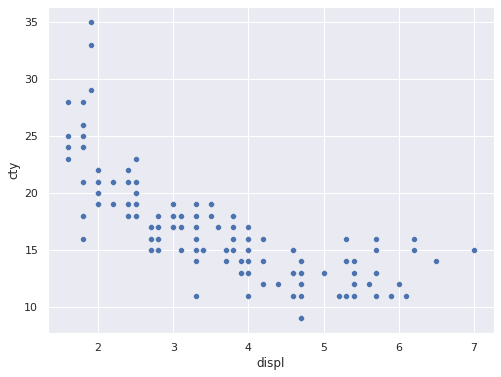

In [61]:
# Cuál es la relación entre el desplazamiento del motor y el rendimiento dentro de la ciudad?
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=auto_df, x = 'displ', y = 'cty')

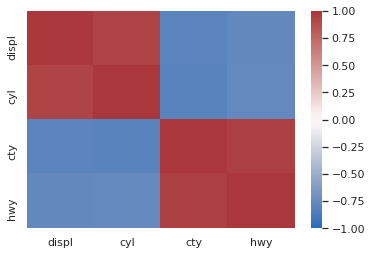

In [43]:
# ¿Cómo se correlacionan las variables numéricas? Muestra esta correlación en un gráfico. (No tomar en cuenta el año como
# variable numérica)

# Sugerencia: usa la paleta de colores 'vlag' o una paleta DIVERGENTE
corr_matrix = auto_df.loc[:, ['displ','cyl','cty','hwy',]].corr()
sns.heatmap(data=corr_matrix, vmin=-1, vmax=1,cmap='vlag')

In [ ]:
# ¿Cuales variables tienen una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa?


manufacturer       audi  chevrolet      dodge  ...  subaru     toyota  volkswagen
year                                           ...                               
1999          17.111111  15.142857  13.375000  ...    19.0  18.150000   21.250000
2008          18.111111  14.916667  12.952381  ...    19.5  19.071429   20.454545

[2 rows x 15 columns]


Text(0, 0.5, 'Rendimiento en ciudad')

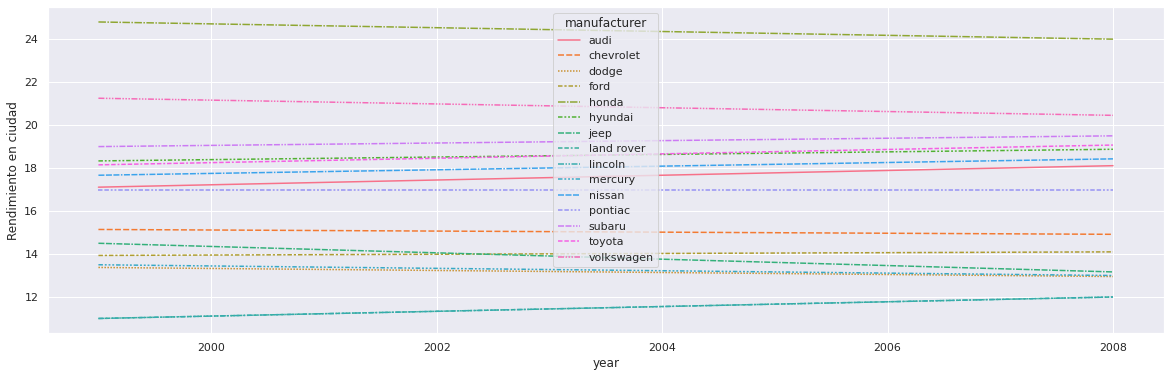

In [71]:
# ¿Los fabricantes mejoran el rendimiento en ciudad conforme pasa el tiempo? Haz una tabla resumen por año y por marca del
# rendimiento promedio y grafica los resultados.
datos=auto_df.groupby(['manufacturer','year'])['cty'].mean()
datos=datos.to_frame('mean_cty')
datos = datos.reset_index()
datos_pivot=pd.pivot_table(data=datos, index='year',columns='manufacturer',values='mean_cty',aggfunc=np.mean)
print(datos_pivot)
fig=plt.figure(figsize=(20,6))
sns.lineplot(data=datos_pivot)
plt.ylabel('Rendimiento en ciudad')